# Model A2, $m_{1} = m_{2}$

In [1]:
%matplotlib widget
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

In [2]:
from smbbh_nu import SMBBH_NU
from plot_process import Plot_Result

## 0. Parameters

In [3]:
# Mass:
m1, m2 = 0.5, 0.5
mass_sum = m1 + m2
black_hole_mass = [m1, m2]

# Radius:
radius = 2
r1, r2 = radius*0.5, radius*0.5

# Eccentricity:
e = 0.3

# Time range:
t0, tf = 0, 100
tl = tf*10

# 3D Rotation:
angles = [np.pi/6, np.pi/4, np.pi/6]  # omega, I, Omega

In [4]:
# Galaxical Potential:
def potential(constant_c, comp_vector, r):
    c_term = (constant_c*comp_vector) / r
    first_term = 1/(r + r**3)
    second_term = np.arctan(r)/(r**2)
    V = c_term*(first_term - second_term)
    return V

In [5]:
# c:
c = (2/np.pi)*(100*m1)

## 1. $E_{total}^{c}$

In [6]:
U = (0.5**3) + c*(np.arctan(radius*0.5)/(radius*0.5)) 

# E total c:
egy_total_c = 2*U

# A:
A = 18  # 12

# E total:
egy_total = -egy_total_c/A
print(np.round(egy_total, 4))

-2.7917


In [7]:
# E1, E2:
egy_1 = egy_total*0.5
egy_2 = egy_total*0.5

E_contro_p1 = egy_1
E_contro_p2 = egy_2

In [8]:
case_1 = SMBBH_NU(black_hole_mass,
                  t0=t0,
                  tf=tf,
                  tl=tl, 
                  constant_c=c,
                  radius=radius,
                  eccentricity=e,
                  angles=angles,
                  potential_function=potential)

### Initial Velocity

In [9]:
# original initial velocity:
vo1_0 = case_1.v1_0
vo2_0 = case_1.v2_0

new_p1_v = np.sqrt((1 - e)*np.sqrt(-E_contro_p1))
new_p2_v = -np.sqrt((1 - e)*np.sqrt(-E_contro_p2))

p1_v0 = np.array([0.0, new_p1_v, 0.0]) 
p2_v0 = np.array([0.0, new_p2_v, 0.0]) 
 

# Set new initial velocity:
case_1.initial_value = np.hstack((case_1.r1_0, case_1.r2_0, 
                                  p1_v0 , p2_v0))

print(np.round(case_1.initial_value**2, 4))

[1.    0.    0.    1.    0.    0.    0.    0.827 0.    0.    0.827 0.   ]


## 2. Run Test

In [10]:
# run
case_1_dict = case_1.run()
for key in case_1_dict.keys():
    print(key)

no_rot_data
rot_data
no_rot_energy
no_rot_energy0
rot_energy
rot_energy0
rot_z_vel_ratio


In [11]:
rot_mod = "rotation"
plot_c = Plot_Result(case_1_dict, radius, t0, tf, tl=tl)

## 3. Plot 2D Plane

#### x-y

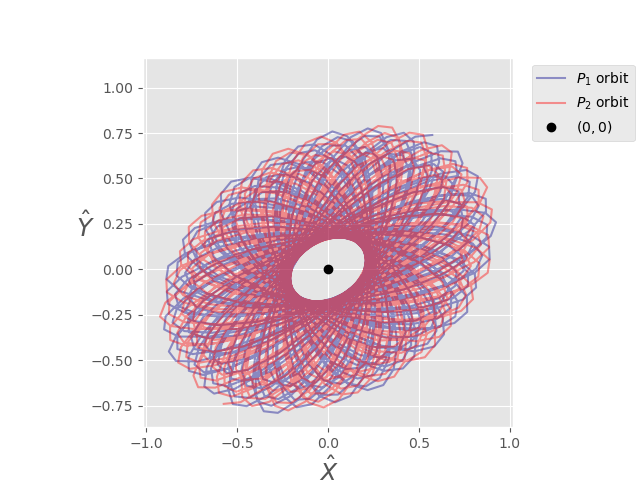

In [12]:
plot_c.plot_2D_plane_orbit(mode=rot_mod, plane_choose="x-y")

#### x-z

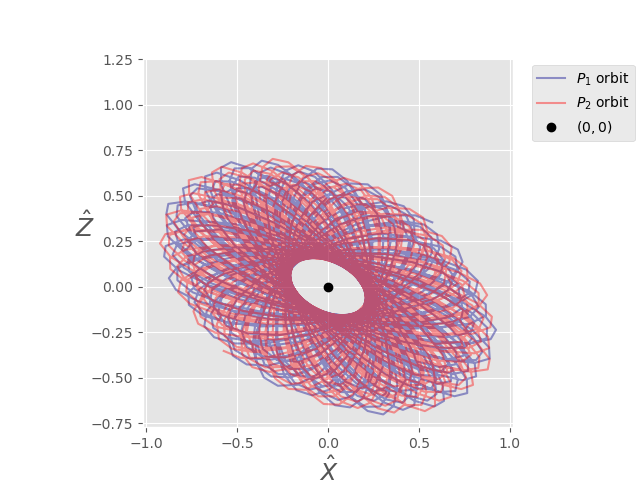

In [13]:
plot_c.plot_2D_plane_orbit(mode=rot_mod, plane_choose="x-z")

## 4. Plot $r_{12}$


 minimum length : 0.46


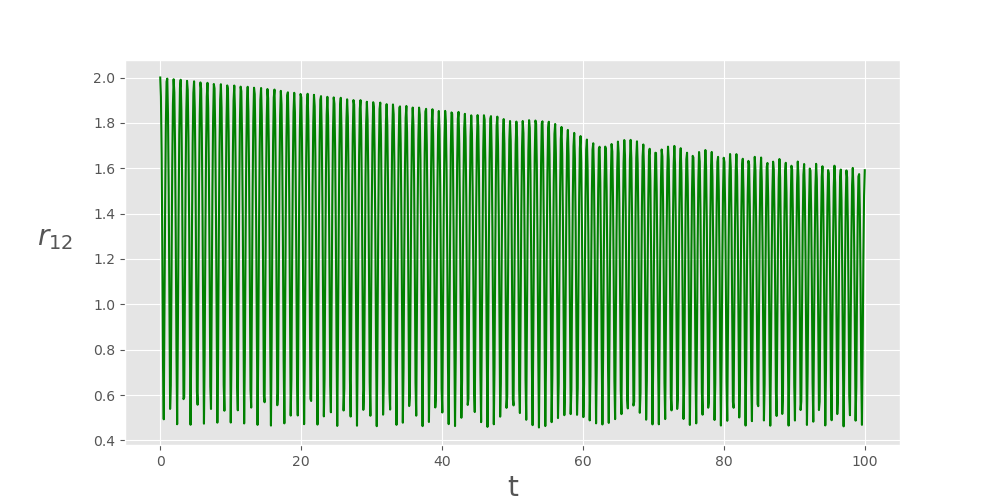

In [14]:
plot_c.plot_r12_length_per_time(mode=rot_mod)

## 5. Plot Total Energy

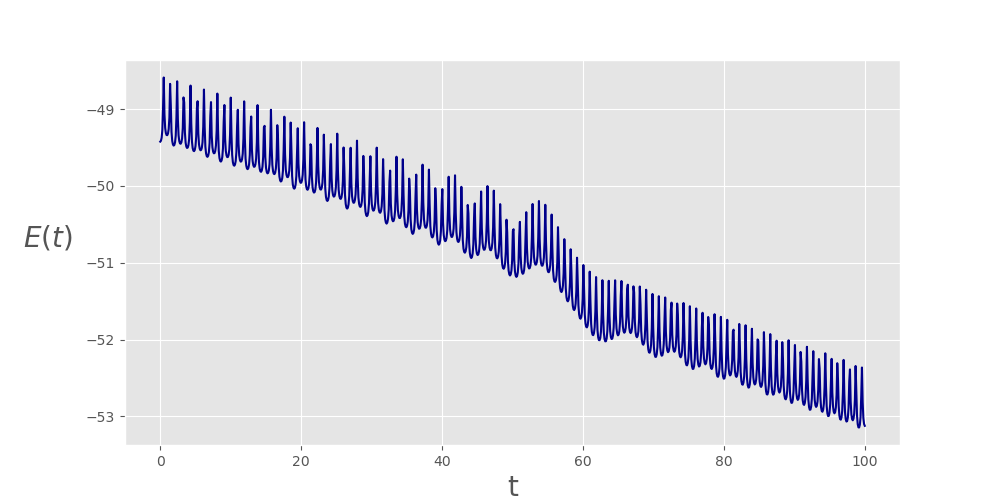

In [15]:
plot_c.plot_total_energy(mode=rot_mod)

## 6. $v1_{z}/v2_{z}$

In [16]:
vz_ratio = case_1_dict['rot_z_vel_ratio']
time_length = np.linspace(t0, tf, tl)

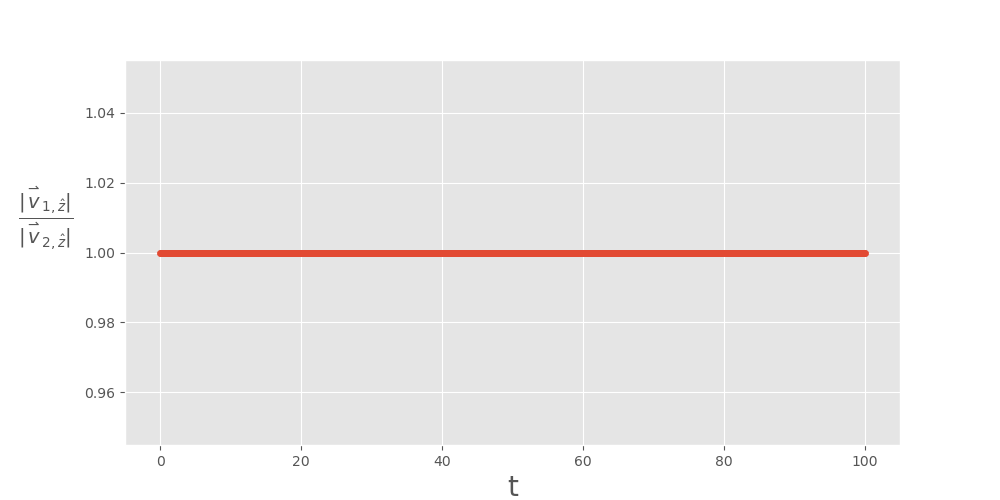

In [17]:
plt.style.use("ggplot")
plt.figure(figsize=(10, 5))
plt.subplot()
plt.scatter(time_length, vz_ratio, s=20)
plt.xlabel("t", fontsize=20)
plt.ylabel(r"$\frac{|\overset{\rightharpoonup}{v}_{1,\hat{z}}|}{|\overset{\rightharpoonup}{v}_{2,\hat{z}}|}$        ", fontsize=20, rotation=0)
plt.show()

In [18]:
p1_v = case_1_dict['rot_data']['p1_velocity']
p2_v = case_1_dict['rot_data']['p2_velocity']
p1_vf = np.sum(p1_v[999, :]**2)
p2_vf = np.sum(p2_v[999, :]**2)

In [19]:
print(np.round(p1_vf, 4))
print(np.round(p2_vf, 4))

0.9682
0.9682


## 7. Initial Position

In [20]:
p1_orb = case_1_dict['rot_data']['p1_orbit']
p2_orb = case_1_dict['rot_data']['p2_orbit']
print(np.round(p1_orb[0], 4))
print(np.round(p2_orb[0], 4))

[0.5732 0.7392 0.3536]
[-0.5732 -0.7392 -0.3536]
